# Convolutional neural network

In [2]:
import h5py # Load the dataset
import matplotlib.pyplot as plt # Draw graphics
import numpy as np # Manage array and data
from tensorflow.keras import layers, models, losses # Tools to build model

## Dataset loading
Load previous generated, optimized dataset. The dataset are already training data, and testing data. We doesn't need to split them.
These images are already shuffle to avoid training reccurency.
We clone array into a numpy array because h5py objects doesn't have some iterators.

In [3]:
f = h5py.File("../dataset.hdf5", "r")

train_images = np.copy(f.get('train').get('images'))
train_labels = np.copy(f.get('train').get('labels'))
test_images = np.copy(f.get('test').get('images'))
test_labels = np.copy(f.get('test').get('labels'))

width, height = f.get('shape') # Images size

f.close()

## Model design

Convolution -> Max pooling -> Convolution

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1))) # Convolution layer
model.add(layers.Dropout(0.2))
model.add(layers.MaxPool2D((4, 4))) # Max pooling layer
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # Convolution layer

model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3))

## Model training

In [5]:
model.compile(optimizer='adam',
              loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels))

Epoch 1/50
163/163 [==============================] - 3s 14ms/step - loss: 0.9046 - accuracy: 0.5776 - val_loss: 0.6807 - val_accuracy: 0.7090
Epoch 2/50
163/163 [==============================] - 2s 10ms/step - loss: 0.6636 - accuracy: 0.7056 - val_loss: 0.5956 - val_accuracy: 0.7496
Epoch 3/50
163/163 [==============================] - 2s 10ms/step - loss: 0.5946 - accuracy: 0.7304 - val_loss: 0.5628 - val_accuracy: 0.7628
Epoch 4/50
163/163 [==============================] - 2s 10ms/step - loss: 0.5589 - accuracy: 0.7546 - val_loss: 0.5382 - val_accuracy: 0.7573
Epoch 5/50
163/163 [==============================] - 2s 10ms/step - loss: 0.5463 - accuracy: 0.7518 - val_loss: 0.5278 - val_accuracy: 0.7571
Epoch 6/50
163/163 [==============================] - 2s 10ms/step - loss: 0.5320 - accuracy: 0.7631 - val_loss: 0.5086 - val_accuracy: 0.7880
Epoch 7/50
163/163 [==============================] - 2s 10ms/step - loss: 0.5190 - accuracy: 0.7688 - val_loss: 0.4871 - val_accuracy: 0.7981

### Save previously trained model

In [9]:
model.save("../model/cnn/all")

INFO:tensorflow:Assets written to: ../model/cnn/all/assets


## Training statistics

163/163 - 0s - loss: 0.0437 - accuracy: 0.9852


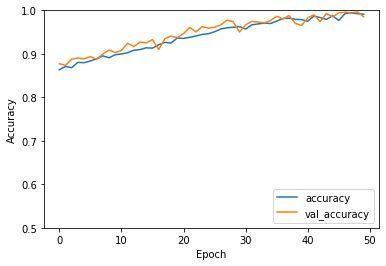

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)